<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Cifar-10 Dataset

The CIFAR-10 dataset contains  60,000 records 32x32 colour images in 10 classes, with 6000 images per class.

The classes are 'airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck' . 

Again which is splitted into 50,000 train & 10,000 test images.The CIFAR-10 dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

The data could be directly dowloaded from https://www.cs.toronto.edu/~kriz/cifar.html. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

## 1 . Install & Import the required packages

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

# 2 . Load the dataset & perform exploratory analysis on the dataset

### 2 .a. Import the Cifar-10 dataset

In [4]:
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)


170508288/170498071 [==============================] - 4s 0us/step


### 2 .b. Print out the datashape of train & test 

In [5]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### 2 .c.  Visualize a particular image

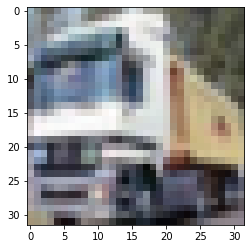

In [6]:
plt.imshow(x_train[1])

### 2 .d.  Visualize a portion of the dataset

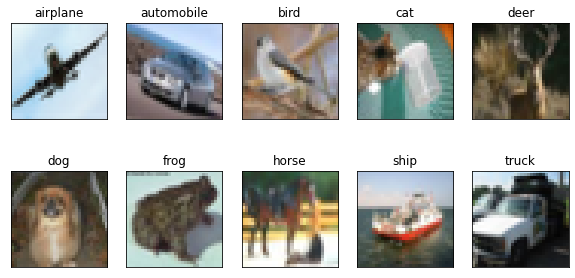

In [7]:
# plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### 2 .e.  Process the train & test data

In [31]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [9]:
# Normalizing the input image
x_train = x_train/255.0
x_test = x_test/255

# 3 .  Build a classification model for the dataset

### 3 .a.Prepare a basic CNN (4 Layer) model

In [10]:
input_shape =x_train[1].shape

In [11]:
input_shape

(32, 32, 3)

In [12]:
model =Sequential()
model.add(Flatten(input_shape=(input_shape)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

### 3 .b.  Visualize the model flow

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


### 3 .c.  Fit the model in the data

In [14]:
# compile (Hidden Output)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

epochs=50

# Training the model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 7s 3ms/step - loss: 1.8962 - accuracy: 0.3201 - val_loss: 1.7630 - val_accuracy: 0.3765
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7075 - accuracy: 0.3943 - val_loss: 1.8012 - val_accuracy: 0.3552
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6285 - accuracy: 0.4213 - val_loss: 1.6233 - val_accuracy: 0.4190
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5778 - accuracy: 0.4394 - val_loss: 1.5636 - val_accuracy: 0.4540
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5367 - accuracy: 0.4555 - val_loss: 1.5572 - val_accuracy: 0.4484
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5016 - accuracy: 0.4681 - val_loss: 1.5609 - val_accuracy: 0.4481
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4723 - accuracy: 0.4763 - val_loss: 1.4970 - val_accuracy:

# 4 . Evaluate the model

### 4 .a. Visualize the performance  (Accuracy & Loss for both training & validation datda) of the model

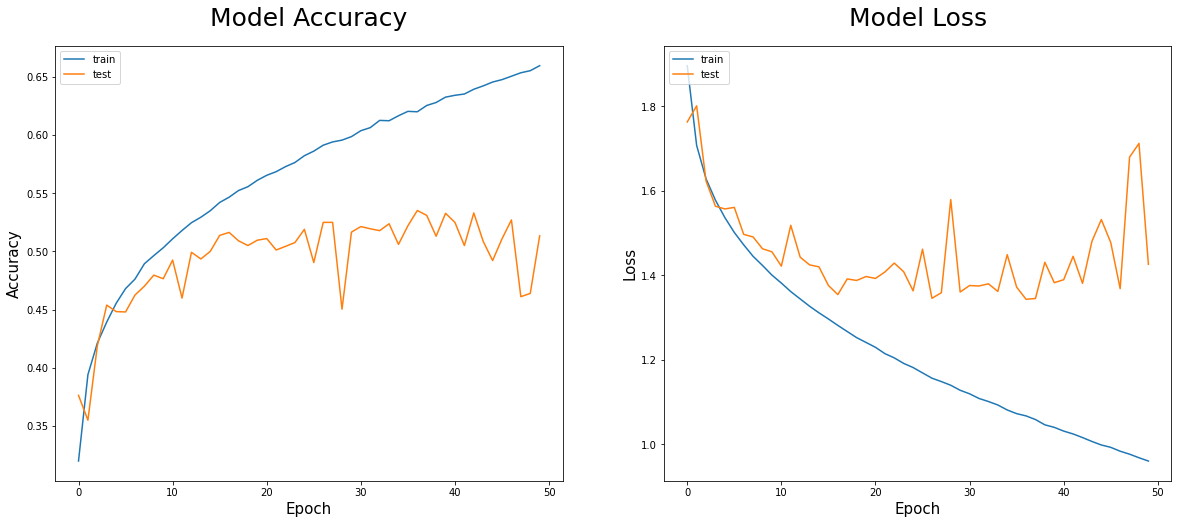

In [15]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4 .b. Visualize a classification analysis report

In [32]:
evaluation = model.evaluate(x_test, y_test)
print("Test Accuracy: {}".format(evaluation[1]))
predicted_classes = model.predict(x_test) 
predicted_classes

313/313 [==============================] - 1s 2ms/step - loss: 1.4262 - accuracy: 0.5134
Test Accuracy: 0.5134000182151794


array([[2.57720277e-02, 4.92963381e-03, 7.54920542e-02, ...,
        1.63455470e-03, 3.23449560e-02, 1.03457738e-03],
       [1.78249683e-02, 2.31527761e-01, 2.55600587e-02, ...,
        6.09065813e-04, 5.94560146e-01, 1.17396794e-01],
       [6.60020113e-01, 1.98563159e-01, 4.04131673e-02, ...,
        1.23750139e-02, 4.70011048e-02, 2.18340177e-02],
       ...,
       [4.09172801e-03, 4.45092301e-04, 4.10617650e-01, ...,
        4.28758338e-02, 6.59832312e-03, 1.34089240e-03],
       [5.04204363e-04, 4.56827365e-05, 6.25440031e-02, ...,
        4.03679498e-02, 1.42829895e-05, 2.03856816e-05],
       [5.50908223e-03, 2.68214289e-03, 2.67380849e-02, ...,
        8.16743135e-01, 1.29676412e-03, 2.12989980e-03]], dtype=float32)

In [35]:
from numpy.core.fromnumeric import argmax


In [39]:
pred = predicted_classes.argmax(1)

In [41]:
actual = y_test.argmax(1)

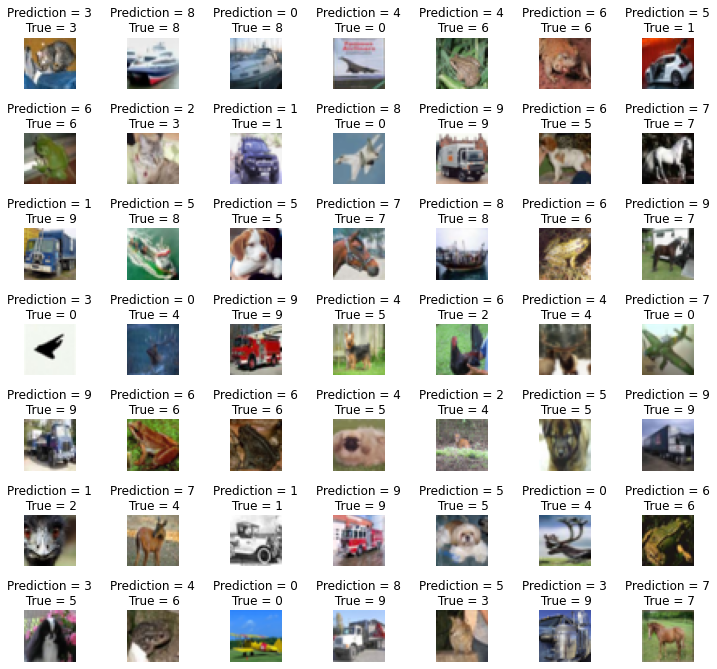

In [42]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
 axes[i].imshow(x_test[i])
 axes[i].set_title("Prediction = {}\n True = {}".format(pred[i], actual[i]))
 axes[i].axis("off")
plt.subplots_adjust(wspace = 1)

# 5 .Prepare Model 2

### 5 .a. Develope the base model

In [16]:
# Building the CNN Model (Hidden Output)

model_1 = Sequential()
model_1.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512,kernel_regularizer=l2(0.01)))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

## 5 .b. Visualize the model flow

In [17]:
# summary of the model (Hidden Input)
print(model_1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                      

### 5 .c.  Fit the model in the data

In [18]:
# compile (Hidden Output)
model_1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

epochs=50

# Training the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 23s 9ms/step - loss: 8.5195 - accuracy: 0.4241 - val_loss: 6.3752 - val_accuracy: 0.5163
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 4.9626 - accuracy: 0.5640 - val_loss: 3.8726 - val_accuracy: 0.6048
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 3.0907 - accuracy: 0.6378 - val_loss: 2.4154 - val_accuracy: 0.6868
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0757 - accuracy: 0.6854 - val_loss: 1.7030 - val_accuracy: 0.7206
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5259 - accuracy: 0.7223 - val_loss: 1.3379 - val_accuracy: 0.7376
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2326 - accuracy: 0.7397 - val_loss: 1.1889 - val_accuracy: 0.7304
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0573 - accuracy: 0.7608 - val_loss: 1.0311 - val_ac

# 6 . Evaluate the modeluate the model 2

### 6 .a. Visualize the performance  (Accuracy & Loss for both training & validation datda) of the model

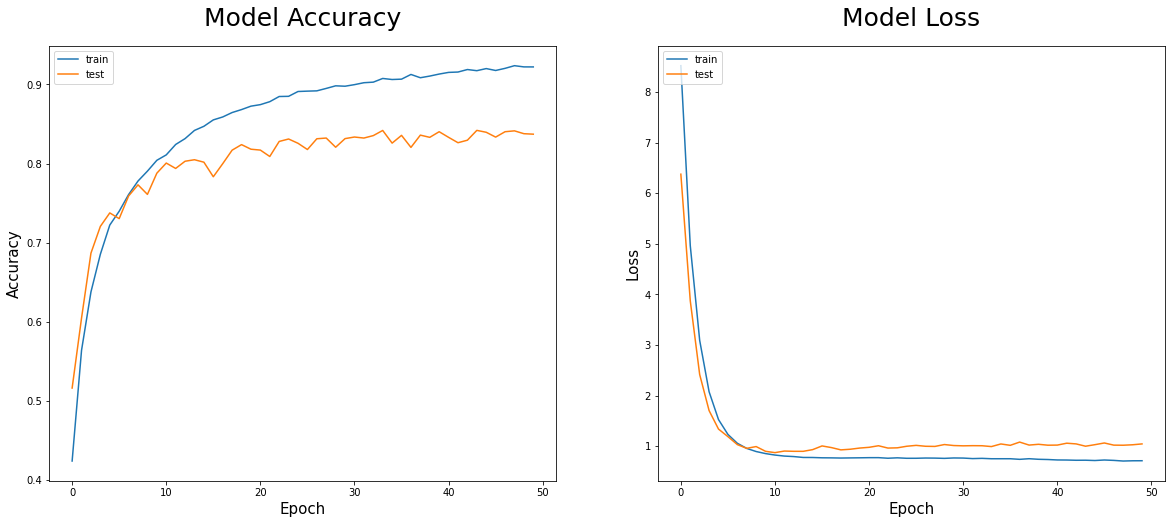

In [19]:
 #Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 6 .b. Visualize a classification analysis report

In [43]:
evaluation = model_1.evaluate(x_test, y_test)
print("Test Accuracy: {}".format(evaluation[1]))
predicted_classes = model_1.predict(x_test) 
predicted_classes

313/313 [==============================] - 1s 4ms/step - loss: 1.0447 - accuracy: 0.8371
Test Accuracy: 0.8371000289916992


array([[2.4980054e-08, 3.0747724e-09, 1.7099349e-07, ..., 6.1589472e-10,
        8.6190759e-08, 9.1836155e-10],
       [1.1907517e-07, 1.6943033e-05, 3.0211388e-13, ..., 5.8265994e-16,
        9.9998295e-01, 2.9460301e-10],
       [2.0190970e-05, 3.4807210e-05, 1.3608208e-08, ..., 6.7357003e-10,
        9.9994469e-01, 7.1361086e-08],
       ...,
       [1.6260685e-09, 4.9334542e-10, 7.1235270e-05, ..., 8.7540699e-05,
        3.1033780e-09, 1.4459774e-08],
       [2.7933827e-01, 5.4344881e-01, 7.4286346e-04, ..., 4.0026847e-04,
        5.1108480e-04, 1.2825268e-04],
       [1.9892148e-08, 5.1149240e-10, 3.1182563e-07, ..., 9.9984729e-01,
        5.0392229e-12, 9.1239620e-09]], dtype=float32)

In [44]:
pred = predicted_classes.argmax(1)

In [45]:
actual = y_test.argmax(1)

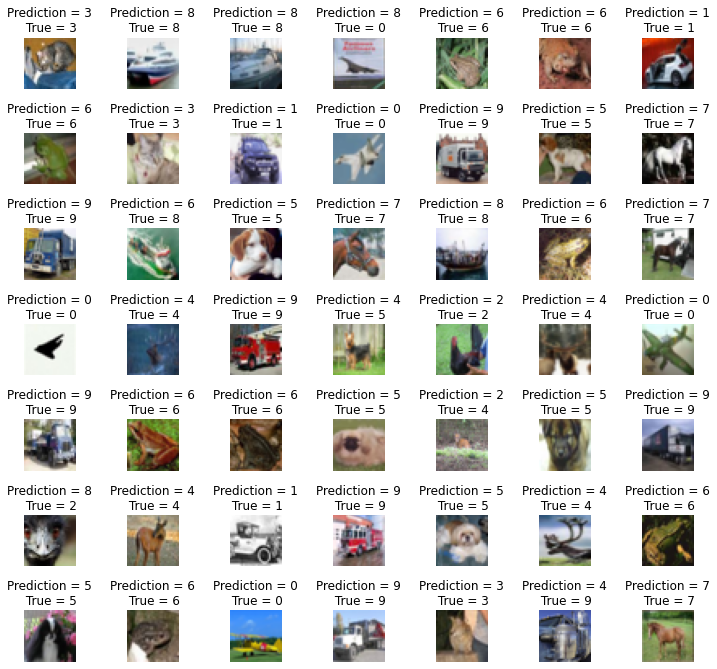

In [46]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
 axes[i].imshow(x_test[i])
 axes[i].set_title("Prediction = {}\n True = {}".format(pred[i], actual[i]))
 axes[i].axis("off")
plt.subplots_adjust(wspace = 1)

# 7 .Store the Weights

In [20]:
model.save('model')
model.save_weights('model.h5')

INFO:tensorflow:Assets written to: model/assets


In [21]:
model_1.save('model_1')
model_1.save_weights('model_1.h5')

INFO:tensorflow:Assets written to: model_1/assets
